<a href="https://colab.research.google.com/github/dileepkumarg-sa/COVID_19-Data-Analysis/blob/master/VoiceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECS708P mini-project submission

The mini-project consists of two components:


1.   **Basic solution** [6 marks]: Using the MLEnd dataset, build a model that predicts the intonation of a short audio segment.
2.   **Advanced solution** [10 marks]: There are two options. (i) Formulate a machine learning problem that can be attempted using the MLEnd dataset and build a solution model (e.g. identify a numeral in a short sequence). (ii) Create a product that uses the functionality provided by a model trained on the MLEnd dataset (e.g. identify a number based on the identification of individual numerals).  

The submission will consist of a single Jupyter notebook for both basic and advanced solution. The uploaded notebook should contain: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and should have **two separate sections** for the basic and the advanced solutions.

What should you include in your notebook?

*   Title, student name, student ID.
*   Brief summary.
*   Dataset preparation.
*   Dataset visualisation.
*   Preprocessing.
*   Model(s) description.
*   Training and validation tasks.
*   Performance evaluation (accuracy, confusion matrix, ROC curve, etc).
*   Conclusions.


How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 


# 1 Basic solution

**Prediction intonation using Logistic Regression Classifier**

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

#from IPython.display import Audio
import IPython.display as ipd
from tqdm import tqdm
import librosa
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels.head()

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited


In [3]:
labels.intonation.value_counts()

question    5000
neutral     5000
bored       5000
excited     5000
Name: intonation, dtype: int64

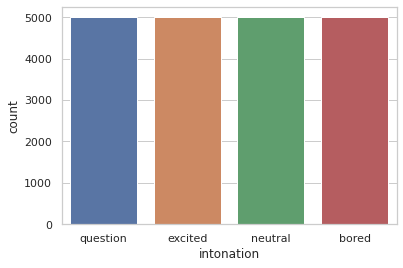

In [4]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="intonation", data=labels)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels['File ID'] = le.fit_transform(labels['File ID'])
labels['participant'] = le.fit_transform(labels['participant'])
into={'bored':0, 'excited':1, 'neutral':2, 'question':3}
labels['intonation']=labels.intonation.map(into)

In [9]:
labels.head()

,File ID,digit_label,participant,intonation
0,0,4,155,3
1,1,2,171,1
2,2,70,129,2
3,3,2,168,0
4,4,4,108,1


In [10]:
X=labels[['File ID', 'digit_label', 'participant']]
y=labels['intonation']

In [11]:
feat_corr = labels.corr()['intonation'][['File ID', 'digit_label', 'participant']]
feat_corr

File ID       -0.002580
digit_label    0.002842
participant    0.006778
Name: intonation, dtype: float64

Splitting Data:

In [12]:
from sklearn.model_selection import train_test_split
#dividing the data in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=45)

Building Logistic Regression Model:

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))

Accuracy Score : 0.25316666666666665
Precision Score : 0.25316666666666665
Recall Score : 0.25316666666666665
F1 Score : 0.25316666666666665


Confusion Matrix:

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve
print(confusion_matrix(y_test,y_pred))

[[ 167    0 1301    0]
 [ 176    0 1309    0]
 [ 158    0 1352    0]
 [ 175    0 1362    0]]


In [15]:
lr_pred = clf.predict(X_test)
sub = pd.DataFrame()
sub['File ID'] = X_test['File ID']
sub['intonation'] = y_pred
sub['intonation']= sub['intonation'].map({0:'bored', 1:'excited', 2:'neutral', 3:'question'})
sub.head()

,File ID,intonation
2725,2725,neutral
13002,13002,neutral
1946,1946,neutral
12871,12871,bored
2335,2335,neutral


The validation accuracy is 25%. So its better model.

# 2 Advanced solution


 **Predicting numeral in audio sequence**

In [16]:
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/training/*.wav')
len(files)

20000

In [17]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels.head()

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited


In [18]:
labels.tail()

,File ID,digit_label,participant,intonation
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral
19999,0019999.wav,20,S101,neutral


In [19]:
labels.digit_label.value_counts()

6             668
1             663
9             663
0             655
8             653
2             652
3             650
5             650
4             641
30            640
14            639
7             638
70            638
100           625
18            625
1000000       623
20            622
15            620
40            618
1000000000    618
60            617
17            614
10            609
50            606
80            605
1000          604
12            601
13            598
11            596
90            595
19            585
16            569
Name: digit_label, dtype: int64

Outlier Detection:
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field

In [20]:
# IQR
import numpy as np
Q1 = np.percentile(labels['digit_label'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(labels['digit_label'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

43.0


In [21]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [22]:
def getXy(files,labels_file,scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    yi = list(labels_file[labels_file['File ID']==fileID]['digit_label'])[0]
    if onlySingleDigit and yi>9:
      continue
    else:
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      X.append(xi)
      y.append(yi)
  return np.array(X),np.array(y)

In [25]:
X,y = getXy(files[:1000],labels_file=labels,scale_audio=True, onlySingleDigit=False)


100%|██████████| 1000/1000 [04:29<00:00,  3.72it/s]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=45)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((700, 4), (300, 4), (700,), (300,))

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)

yt_pred = clf.predict(X_train)
yv_pred = clf.predict(X_val)

In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Train Accuracy Score : ' + str(accuracy_score(y_train,yt_pred)))
print('Test Accuracy Score : ' + str(accuracy_score(y_val,yv_pred)))
print('Precision Score : ' + str(precision_score(y_val,yv_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_val,yv_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_val,yv_pred,average='micro')))

Train Accuracy Score : 0.08285714285714285
Test Accuracy Score : 0.06666666666666667
Precision Score : 0.06666666666666667
Recall Score : 0.06666666666666667
F1 Score : 0.06666666666666667


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val,yv_pred))

[[0 0 0 ... 0 0 1]
 [2 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [32]:
#Import metrics module for accuracy calculation
from sklearn.metrics import classification_report
print(classification_report(y_val,yv_pred, zero_division=True)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       1.00      0.00      0.00        12
           2       1.00      0.00      0.00        11
           3       0.00      0.00      0.00        10
           4       1.00      0.00      0.00        13
           5       0.08      0.12      0.10         8
           6       0.13      1.00      0.23         5
           7       0.00      0.00      0.00         6
           8       0.20      0.14      0.17         7
           9       0.00      0.00      0.00         9
          10       0.04      0.20      0.06         5
          11       0.06      0.12      0.08         8
          12       0.00      0.00      0.00         7
          13       1.00      0.00      0.00        13
          14       0.00      0.00      0.00        15
          15       1.00      0.00      0.00        11
          16       0.00      0.00      0.00        16
          17       0.00    